In [1]:
import os 

import numpy as np 
import pandas as pd

from deepcell.graph_utils import get_max_cells

from deepcell.tmp_funcs import load_mibi_data, load_celltypes

In [12]:
%%time

# data_path = 'D:/GNN/data/TNBC'
data_path = '../data/TNBC/'

mibi_data_path = os.path.join(data_path, 'TNBCShareData')
mibi_label_path = os.path.join(data_path, 'TNBC_labels/label_images.npy')
mibi_celltype_path = os.path.join(data_path, 'TNBCcellTypes')
TNBCpanelInfo_path = os.path.join(data_path,'TNBCpanelInfo.csv')

# print(mibi_data_path)

POINT_LIST = [2, 5, 8, 9, 21, 22, 24, 26, 34, 37, 38, 41]

mibi_data = load_mibi_data(mibi_data_path, point_list=POINT_LIST)
mibi_labels = np.load(mibi_label_path)
mibi_celltypes = load_celltypes(mibi_celltype_path, point_list=POINT_LIST)


# Shrink raw data and labelsa to line up with cell type image
tmp_mibi_data = mibi_data[:,30:-30, 30:-30, :]
mibi_labels = mibi_labels[:,30:-30, 30:-30, :]
mibi_celltypes = mibi_celltypes[:,30:-30, 30:-30, :]

CPU times: user 33.5 s, sys: 3.38 s, total: 36.9 s
Wall time: 36.9 s


In [13]:
mibi_labels.shape

(12, 1988, 1988, 1)

In [14]:
label_image = np.squeeze(mibi_labels)
label_image.shape

(12, 1988, 1988)

In [15]:
max_cells = get_max_cells(label_image)
max_cells

3953

In [16]:
adjacency_matrix = np.zeros((label_image.shape[0], max_cells, max_cells))
centroid_matrix = np.zeros((label_image.shape[0], max_cells, 2))
label_matrix = np.zeros((label_image.shape[0], max_cells))

In [22]:
from skimage.measure import regionprops_table

In [23]:
for batch in range(label_image.shape[0]):
    label_image_batch = label_image[batch]
    
    props = regionprops_table(label_image_batch, properties=['centroid', 'label'])
    
    break

In [26]:
props['centroid-0'].shape

(2343,)

In [28]:
np.stack([props['centroid-0'], props['centroid-1']], axis=-1).shape

(2343, 2)

In [30]:
props['label'].shape

(2343,)

In [31]:
np.stack([props['centroid-0'], props['centroid-1']], axis=-1)

array([[   5, 1038],
       [   2, 1772],
       [   0, 1369],
       ...,
       [1984,  693],
       [1987, 1057],
       [1984,  286]])

In [32]:
from scipy.spatial.distance import cdist

In [ ]:
cdist()

In [1]:
import numpy as np
import skimage as sk

In [2]:
test = sk.data.binary_blobs(128, n_dim=2)

In [3]:
np.unique(sk.measure.label(test))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
def _get_dummy_mibi_data(num_batches=3, img_dim=128):
    """dockersting holder - generate fake mibi data """
    # generate feature data
    
    multiplexed_img = []
    for _ in range(num_batches):
        bias = np.random.rand(img_dim, img_dim, 1)*64
        variance = np.random.rand(img_dim, img_dim, 1) * (255-64)
        imarray = np.random.rand(img_dim, img_dim, 6) * variance + bias
        multiplexed_img.append(imarray)
    multiplexed_img = np.array(multiplexed_img)


    # generate label data
    labels = []
    while len(labels) < num_batches:
        _x = sk.data.binary_blobs(length=img_dim, n_dim=2)
        _y = sk.measure.label(_x)
        if len(np.unique(_y)) > 3:
            labels.append(_y)

    labels = np.stack(labels, axis=0)
    labels = np.expand_dims(labels, axis=-1)

    return multiplexed_img.astype('float32'), labels.astype('int32')

In [13]:
x, y = _get_dummy_mibi_data()

In [14]:
x.shape

(3, 128, 128, 6)

In [15]:
y.shape

(3, 128, 128, 1)

In [4]:
max([3,5,20])

20

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy

In [37]:
g = nx.Graph()
  
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)

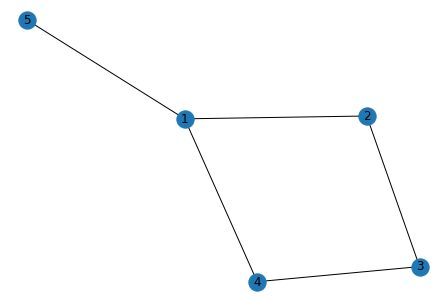

In [38]:
nx.draw(g, with_labels=True)

In [39]:
g.degree()

DegreeView({1: 3, 2: 2, 3: 2, 4: 2, 5: 1})

In [40]:
adj = nx.linalg.adj_matrix(g)

In [43]:
np_adj = adj.toarray()

In [51]:
np_adj

array([[0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [1]:
import spektral
from spektral import transforms

In [2]:
spektral.transforms.gcn_filter.GCNFilter(symmetric=True)

In [56]:
spektral.transforms

AttributeError: module 'spektral' has no attribute 'transforms'

In [55]:
spektral.__version__

'0.6.1'

In [42]:
type(adj) == scipy.sparse.csr.csr_matrix

True

In [46]:
laplacian = nx.linalg.laplacian_matrix(g)

In [47]:
degree = laplacian + adj

In [49]:
degree.toarray()**-.05

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


array([[0.94655082,        inf,        inf,        inf,        inf],
       [       inf, 0.96593633,        inf,        inf,        inf],
       [       inf,        inf, 0.96593633,        inf,        inf],
       [       inf,        inf,        inf, 0.96593633,        inf],
       [       inf,        inf,        inf,        inf, 1.        ]])

In [45]:
scipy.sparse.csr.csr_matrix(np_adj)

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [50]:
adj

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [44]:


 # or something, IDK what the answer should be

In [30]:
from deepcell.graph_utils import get_max_cells

In [39]:
get_max_cells(x)

4

In [38]:
x.shape

(1, 8, 8, 1)

In [42]:
np.squeeze(x[0,...])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]])

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.spatial.distance import cdist
from skimage.measure import regionprops_table
from deepcell import graph_utils


In [3]:
x = np.zeros((8, 8))

x[0, 0] = 1
x[7, 7] = 2
x[7, 0] = 5
x[4, 5] = 6
x[0, 7] = 10

x = np.expand_dims(x,axis=0).astype('int')
x = np.expand_dims(x,axis=-1)

In [4]:
true_centroids = np.array([[0,0], [7,7], [7,0], [4,5], [0,7]])
true_centroids

array([[0, 0],
       [7, 7],
       [7, 0],
       [4, 5],
       [0, 7]])

In [5]:
true_labels = np.array([1,2,5,6,10])
true_labels

array([ 1,  2,  5,  6, 10])

In [6]:
x.shape

(1, 8, 8, 1)

In [7]:
max_cells = graph_utils.get_max_cells(x)

In [15]:
adjacency_matrix = np.zeros((x.shape[0], max_cells, max_cells))
centroid_matrix = np.zeros((x.shape[0], max_cells, 2))
label_matrix = np.zeros((x.shape[0], max_cells))

In [9]:
adjacency_matrix.shape

(1, 5, 5)

In [10]:
label_image_batch = np.squeeze(x)
label_image_batch.shape

(8, 8)

In [11]:
props = regionprops_table(label_image_batch, properties=['centroid', 'label'])
centroids = np.stack([props['centroid-0'], props['centroid-1']], axis=-1)
labels = props['label']
distances = cdist(centroids, centroids, metric='euclidean')

In [12]:
distances

array([[0.        , 9.89949494, 7.        , 6.40312424, 7.        ],
       [9.89949494, 0.        , 7.        , 3.60555128, 7.        ],
       [7.        , 7.        , 0.        , 5.83095189, 9.89949494],
       [6.40312424, 3.60555128, 5.83095189, 0.        , 4.47213595],
       [7.        , 7.        , 9.89949494, 4.47213595, 0.        ]])

In [13]:
distances < distances.mean()*.1

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True]])

In [16]:
adjacency_matrix[0, 
                 0:distances.shape[0], 
                 0:distances.shape[1]] = distances < distances.mean()*0.01
adjacency_matrix

array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]])

In [17]:
adjacency_matrix[0,
                 0:distances.shape[0],
                 0:distances.shape[1]] -= np.eye(distances.shape[0])
adjacency_matrix

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [18]:
np.sum(adjacency_matrix)

0.0

In [50]:
distances.mean()*0.7

9.899494936611665

In [13]:
centroids

array([[0, 0],
       [7, 7],
       [7, 0],
       [4, 5],
       [0, 7]])

In [16]:
centroid_matrix.shape

(1, 5, 2)

In [18]:
centroid_matrix[0, 0:centroids.shape[0], :] = centroids
centroid_matrix

array([[[0., 0.],
        [7., 7.],
        [7., 0.],
        [4., 5.],
        [0., 7.]]])

In [21]:
labels

array([ 1,  2,  5,  6, 10])

In [22]:
label_matrix.shape

(1, 5)

In [23]:
label_matrix[0, 0:labels.shape[0]] = labels
label_matrix

array([[ 1.,  2.,  5.,  6., 10.]])

In [24]:
(true_labels == label_matrix).all()

True

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from skimage.measure import regionprops_table
from deepcell import graph_utils

In [3]:
y = [[2, 0, 1, 5, 3, 4, 0, 7],
     [6, 8, 3, 0, 7, 6, 2, 1],
     [6, 6, 5, 9, 5, 2, 2, 8],
     [5, 0, 1, 8, 6, 8, 5, 4],
     [7, 1, 0, 1, 1, 0, 0, 3],
     [5, 6, 9, 6, 0, 6, 6, 7],
     [8, 2, 0, 8, 4, 0, 5, 5],
     [8, 6, 3, 7, 2, 4, 6, 7]]
y = np.array(y)

y = np.expand_dims(y,axis=0)
y = np.expand_dims(y,axis=-1)

In [4]:
y.shape

(1, 8, 8, 1)

In [5]:
# create a test label image
x = np.zeros((8, 8))
x[0, 0] = 1
x[7, 7] = 2
x[7, 0] = 5
x[4, 5] = 6
x[0, 7] = 10

# add a batch and a value dim
# x dims are (batch, img_dim, img_dim, 1)
x = np.expand_dims(x,axis=0)
x = np.expand_dims(x,axis=-1).astype('int')

In [6]:
x.shape

(1, 8, 8, 1)

In [7]:
max_cells = graph_utils.get_max_cells(x)

In [8]:
feature_matrix = np.zeros((y.shape[0], max_cells, y.shape[-1]))
label_matrix = np.zeros((x.shape[0], max_cells))

In [9]:
label_image_batch = np.squeeze(x)
label_image_batch.shape

(8, 8)

In [10]:
image_batch = y[0]
image_batch.shape

(8, 8, 1)

In [11]:
props = regionprops_table(label_image_batch,
                          intensity_image=image_batch[..., 0],
                          properties=['mean_intensity', 'label'])

In [20]:
mean_intensity = props['mean_intensity']
labels = props['label']

In [14]:
mean_intensity

array([2., 7., 8., 0., 7.])

In [18]:
feature_matrix[0, 0:mean_intensity.shape[0], 0] = mean_intensity
feature_matrix

array([[[2.],
        [7.],
        [8.],
        [0.],
        [7.]]])

In [19]:
feature_matrix.shape

(1, 5, 1)

In [21]:
labels

array([ 1,  2,  5,  6, 10])

In [23]:
label_matrix[0, 0:labels.shape[0]] = labels
label_matrix

array([[ 1.,  2.,  5.,  6., 10.]])

In [24]:
label_matrix.shape

(1, 5)

In [30]:
(true_features == feature_matrix).all()

In [15]:
x = np.zeros((8, 8))
x[0, 0] = 1
x[7, 7] = 2
x[7, 0] = 5
x[4, 5] = 6
x[4, 4] = 6
x[0, 7] = 10
x[1, 7] = 10
x[0, 6] = 10
x[1, 6] = 10

In [16]:
x

array([[ 1.,  0.,  0.,  0.,  0.,  0., 10., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]])

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from skimage.measure import regionprops_table
from deepcell import graph_utils

from scipy.stats import mode

In [3]:
y = [[2, 2, 0, 2, 1, 1, 1, 1],
     [0, 2, 0, 0, 2, 1, 2, 1],
     [1, 2, 1, 1, 2, 1, 2, 2],
     [2, 1, 0, 1, 0, 0, 2, 2],
     [0, 1, 0, 0, 0, 0, 2, 0],
     [1, 0, 0, 0, 1, 0, 2, 1],
     [0, 1, 0, 2, 2, 1, 0, 2],
     [0, 0, 2, 2, 0, 1, 1, 2]]

y = np.array(y)

y = np.expand_dims(y,axis=0)
y = np.expand_dims(y,axis=-1)

In [5]:
y.shape

(1, 8, 8, 1)

In [4]:
x = np.zeros((8, 8))
x[0, 0] = 1
x[7, 7] = 2
x[7, 0] = 5
x[4, 5] = 6
x[4, 4] = 6
x[0, 7] = 10
x[1, 7] = 10
x[0, 6] = 10
x[1, 6] = 10

# add a batch and a value dim
# x dims are (batch, img_dim, img_dim, 1)
x = np.expand_dims(x,axis=0)
x = np.expand_dims(x,axis=-1).astype('int')

In [6]:
x.shape

(1, 8, 8, 1)

In [7]:
max_cells = graph_utils.get_max_cells(x)

In [9]:
celltype_matrix = np.zeros((x.shape[0], max_cells))
celltype_matrix.shape

(1, 5)

In [10]:
label_image_batch = np.squeeze(x)
celltype_image_batch = np.squeeze(y)

In [11]:
label_image_batch.shape, celltype_image_batch.shape

((8, 8), (8, 8))

In [12]:
props = regionprops_table(label_image_batch,
                          properties=['coords', 'label'])

In [13]:
for i in range(len(props['coords'])):
    coords = props['coords'][i]
    cell_type_list = celltype_image_batch[coords[:, 0], coords[:, 1]]
    cell_type = mode(cell_type_list, axis=None).mode[0]
    celltype_matrix[0, i] = cell_type

In [14]:
celltype_matrix

array([[2., 2., 0., 0., 1.]])

In [33]:
for i in range(len(props['coords'])):
    coords = props['coords'][i]
    print(coords)
    print()

[[0 0]]

[[7 7]]

[[7 0]]

[[4 4]
 [4 5]]

[[0 6]
 [0 7]
 [1 6]
 [1 7]]



In [36]:
coords = props['coords'][4]
coords[:,0], coords[:,1]

(array([0, 0, 1, 1]), array([6, 7, 6, 7]))

In [37]:
celltype_image_batch[coords[:, 0], coords[:, 1]]

array([1, 1, 2, 1])

In [38]:
true_celltypes = np.array([2., 2., 0., 0., 1.])

In [41]:
x = np.zeros((8, 8))
x[0, 0] = 1
x[7, 7] = 2
x[7, 0] = 5
x[4, 5] = 6
x[4, 4] = 6
x[0, 7] = 10
x[1, 7] = 10
x[0, 6] = 10
x[1, 6] = 10

# add a batch and a value dim
# x dims are (batch, img_dim, img_dim, 1)
x = np.expand_dims(x,axis=0)
x = np.expand_dims(x,axis=-1).astype('int')

y = [[2, 2, 0, 2, 1, 1, 1, 1],
    [0, 2, 0, 0, 2, 1, 2, 1],
    [1, 2, 1, 1, 2, 1, 2, 2],
    [2, 1, 0, 1, 0, 0, 2, 2],
    [0, 1, 0, 0, 0, 0, 2, 0],
    [1, 0, 0, 0, 1, 0, 2, 1],
    [0, 1, 0, 2, 2, 1, 0, 2],
    [0, 0, 2, 2, 0, 1, 1, 2]]

y = np.array(y)

y = np.expand_dims(y,axis=0)
y = np.expand_dims(y,axis=-1)

# true cell types
true_celltypes = np.array([2., 2., 0., 0., 1.])

celltype_matrix = graph_utils.get_celltypes(x, y)


assert (true_celltypes == celltype_matrix).all()